## Compare Sagnac Frequency and Beam Power

## Imports

In [9]:
import os
import matplotlib.pyplot as plt

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime, read

## Configurations

In [10]:
config = {}

config['seed'] = "BW.DROMY..FJZ"


config['tbeg'] = UTCDateTime("2023-04-04 00:00")
config['tend'] = UTCDateTime("2023-04-04 00:00")

config['datapath'] = "/home/andbro/kilauea-data/sagnac_frequency/beampower/"

## Load Data

In [11]:
def __load_data(config):
    
    net, sta, loc, cha = config['seed'].split(".")
    
    t1 = date.fromisoformat(str(config['tbeg'].date))
    t2 = date.fromisoformat(str(config['tend'].date))

    df = DataFrame()
    for dat in date_range(t1,t2):
        file = cha+"_"+str(dat)[:10].replace("-","")+".pkl"

        try:
            df0 = read_pickle(config['datapath']+file)
            df = concat([df, df0])
        except:
            print(f"error for {config['datapath']}{file}")
            
    return df

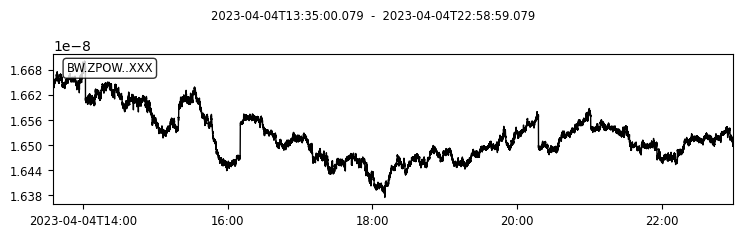

In [26]:
config['seed'] = "BW.DROMY..FJZ"
fjz = __load_data(config)


power = read(config['datapath']+"FJZ_powermeter.mseed")
power.plot();


In [31]:
from andbro__utc_to_mjd import __utc_to_mjd

times_mjd = __utc_to_mjd(list(power[0].times("utcdatetime")))

In [43]:
## creating dataframe
power_df = DataFrame()

power_df['power_W'] = power[0].data
power_df['times_mjd'] = times_mjd

In [47]:
## Trimming fjz
fjz = fjz[(fjz.times_mjd >= power_df.times_mjd[0]) & (fjz.times_mjd <= power_df.times_mjd[len(power_df.times_mjd)-1])]

## Plot Power

In [69]:
def __makeplot_beampower(df1, df2):
    
    def __smooth(y, box_pts):
        from numpy import ones, convolve, hanning

#         win = ones(box_pts)/box_pts
        win = hanning(box_pts)
        y_smooth = convolve(y, win/sum(win), mode='same')

        return y_smooth
    
    
    ## ___________________
    ##
    
    fig, ax = plt.subplots(2,1, figsize=(15,7), sharex=True)
    
    plt.subplots_adjust(hspace=0.05)
    
    font = 14
    smooting = 10
    cut_off = int(smooting/2)
    
    ## DF1
#     ax[0].scatter(df1['times_mjd'], df1['freqs'], c="#3776ab", s=10, alpha=0.4, zorder=2, label="FJZ")
    ax[0].plot(df1['times_mjd'], df1['freqs'], c="#3776ab", alpha=0.8, zorder=2, label="FJZ")
    
    
    ## DF2
#     ax[1].scatter(df2['times_mjd'], df2['power_W'], c="#f48512", s=10, alpha=0.4, zorder=2, label="F1Z*")
    ax[1].plot(df2['times_mjd'], df2['power_W'], c="#f48512", alpha=0.8, zorder=2)

    ax1_2= ax[1].twinx()
    
    ax1_2.plot(df1['times_mjd'], df1['psd_max'], c="#3776ab", alpha=0.8, zorder=2, label="FJZ")


#     ax[2].set_ylim(5e12, 2e14)
        
#     ax[0].set_ylim(min(df1['freqs'][1:10]), max(df1['freqs'][1:10]))

#     ax[0].set_ylim(553.4550, 553.4655)
    
    
    ax[0].ticklabel_format(useOffset=False, style='plain')
    ax[1].ticklabel_format(useOffset=False, style='plain')
       
    ax[0].set_yscale("log")
    ax[1].set_yscale("log")
    
    ax[0].set_ylabel(r"Beat Note (Hz)", fontsize=font)
    ax[1].set_ylabel(r"Power (W)", fontsize=font)
    ax1_2.set_ylabel(r"PSD$_{max}$", fontsize=font, color="#3776ab")

    ax[1].set_xlabel("Days (MJD)", fontsize=font)
    
#     ax[0].set_title("ROMY-U Sagnac-Frequency", fontsize=font+2, pad=10)
    ax[0].legend(loc=4)
    
    for i in range(2):
        ax[i].grid(zorder=0)
    
    plt.show();

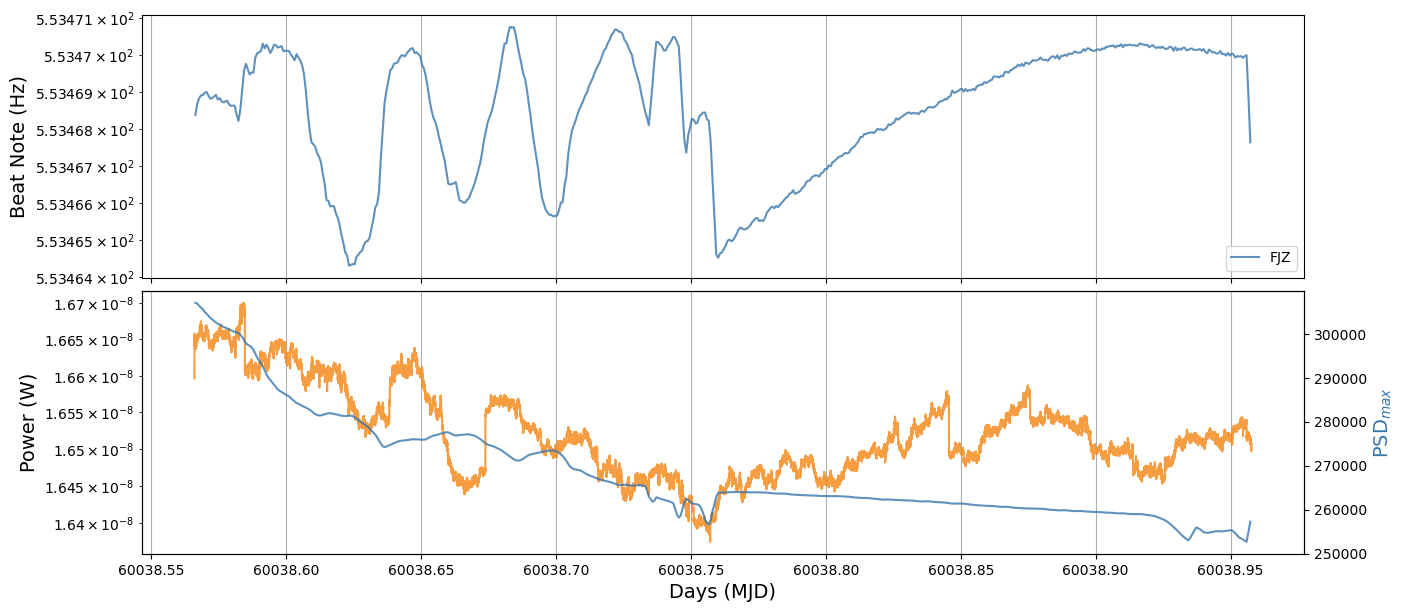

In [70]:
__makeplot_beampower(fjz, power_df)